In [1]:
import DiadFit as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Lets compare our results to Kerrick and Jacobs (1981)
- This spreadsheet of KJ values was kindly provided by Andreas Klugel

In [2]:
# Spreadsheet kindly provided by andreas Klugel showing how the Kerric and Jacobs (1981) EOS works
# Pure CO2
df_K=pd.read_excel('KerrickJacobs81_Density-Pressure-Calc.xlsx', sheet_name='pure CO2')
# 10mol %%python2# Spreadsheet kindly provided by andreas Klugel showing how the Kerric and Jacobs (1981) EOS works
df_K_10=pd.read_excel('KerrickJacobs81_Density-Pressure-Calc.xlsx', sheet_name='0.9 CO2 + 0.1 H2O')

Text(0, 0.5, 'Pressure Difference: KJ- DZ06 (MPa)')

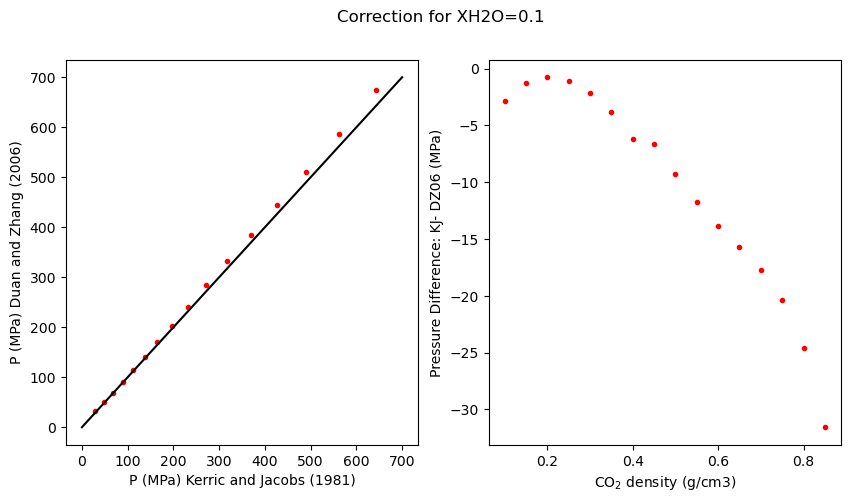

In [3]:
P_10=pf.calculate_entrapment_P_XH2O(XH2O=0.1, CO2_dens_gcm3=df_K_10['Density (g/cm3)'], T_K=1150+273.15)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Correction for XH2O=0.1')
ax1.plot(df_K_10['P calculated'],  100*P_10['P_kbar_mixCO2_DZ06'], '.r')
ax1.plot([0, 700], [0, 700], '-k')
ax1.set_xlabel('P (MPa) Kerric and Jacobs (1981)')
ax1.set_ylabel('P (MPa) Duan and Zhang (2006)')

ax2.plot(df_K_10['Density (g/cm3)'], df_K_10['P calculated']-100*P_10['P_kbar_mixCO2_DZ06'], '.r')
ax2.set_xlabel('CO$_2$ density (g/cm3)')
ax2.set_ylabel('Pressure Difference: KJ- DZ06 (MPa)')

- They are pretty similar, except at the highest pressures (to be expected, this is when mixing gets complex!)

## Lets compare calculations of fugacity, activity etc to the Yoshimura et al. (2003) C code

In [4]:
df_C=pd.read_excel('Duan_Zhang_2006_C_Code.xlsx', sheet_name='Sheet1')

In [8]:
df=pf.calc_prop_knownP_EOS_DZ2006(P_kbar=df_C['P (bar)']/1000, T_K=df_C['T (K)'], XH2O=1-df_C['yCO2'])
df.head()

,P_kbar,T_K,XH2O,XCO2,Molar Volume (cm3/mol),Density (g/cm3),Compressability_factor,fugacity_H2O (kbar),fugacity_CO2 (kbar),activity_H2O,activity_CO2
0,0.5,1200,0.0,1.0,225.230282,0.195356,1.128707,0.000000,0.564603,0.000000,1.000000
1,0.5,1200,0.1,0.9,222.051424,0.186443,1.112776,0.046820,0.508090,0.098150,0.899907
2,0.5,1200,0.2,0.8,218.772703,0.177353,1.096346,0.093845,0.451459,0.196730,0.799603
3,0.5,1200,0.3,0.7,215.407313,0.168054,1.079480,0.141110,0.394703,0.295814,0.699080
4,0.5,1200,0.4,0.6,211.970560,0.158513,1.062258,0.188635,0.337842,0.395442,0.598370


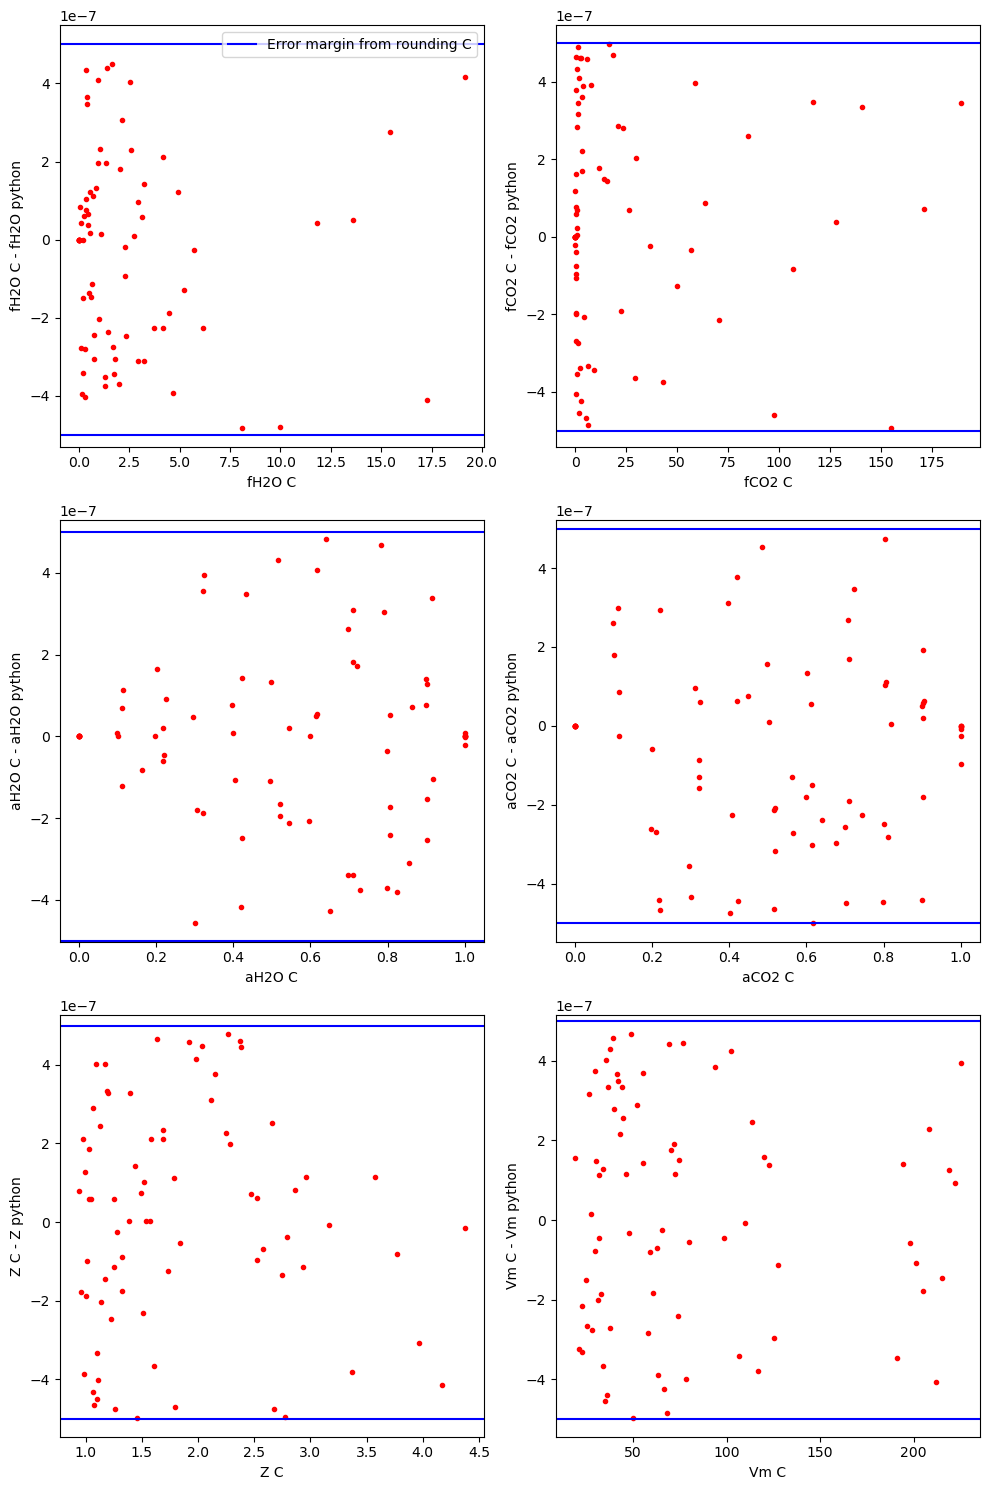

In [9]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 15))
error_margin = 5e-7  # Error margin from rounding the C ouptuts


# For fH2O
ax1.plot(df_C['fH2O (kbar)'], df_C['fH2O (kbar)'] - df['fugacity_H2O (kbar)'], '.r')
ax1.set_ylabel('fH2O C - fH2O python')
ax1.set_xlabel('fH2O C')

# For fCO2
ax2.plot(df_C['fCO2 (kbar)'], df_C['fCO2 (kbar)'] - df['fugacity_CO2 (kbar)'], '.r')
ax2.set_ylabel('fCO2 C - fCO2 python')
ax2.set_xlabel('fCO2 C')

# For aH2O
ax3.plot(df_C['aH2O'], df_C['aH2O'] - df['activity_H2O'], '.r')
ax3.set_ylabel('aH2O C - aH2O python')
ax3.set_xlabel('aH2O C')

# For aCO2
ax4.plot(df_C['aCO2'], df_C['aCO2'] - df['activity_CO2'], '.r')
ax4.set_ylabel('aCO2 C - aCO2 python')
ax4.set_xlabel('aCO2 C')

# For Z (Compressibility factor)
ax5.plot(df_C['Z'], df_C['Z'] - df['Compressability_factor'], '.r')
ax5.set_ylabel('Z C - Z python')
ax5.set_xlabel('Z C')

# For Vm (Molar Volume)
ax6.plot(df_C['Vm (cm3/mol)'], df_C['Vm (cm3/mol)'] - df['Molar Volume (cm3/mol)'], '.r')
ax6.set_ylabel('Vm C - Vm python')
ax6.set_xlabel('Vm C')

ax1.axhline(y=error_margin, color='b', linestyle='-', label='Error margin from rounding C')
ax1.axhline(y=-error_margin, color='b', linestyle='-')
ax2.axhline(y=error_margin, color='b', linestyle='-')
ax2.axhline(y=-error_margin, color='b', linestyle='-')
ax3.axhline(y=error_margin, color='b', linestyle='-')
ax3.axhline(y=-error_margin, color='b', linestyle='-')
ax4.axhline(y=error_margin, color='b', linestyle='-')
ax4.axhline(y=-error_margin, color='b', linestyle='-')
ax5.axhline(y=error_margin, color='b', linestyle='-')
ax5.axhline(y=-error_margin, color='b', linestyle='-')
ax6.axhline(y=error_margin, color='b', linestyle='-')
ax6.axhline(y=-error_margin, color='b', linestyle='-')
ax1.legend()

plt.tight_layout()
plt.show()


## Oddities
- The code currently shows very unstable behavoir around 2 kbar for Pressure and volume. This is because of how the coefficients work. In progress (also a problem in the C code -e.g. its an issue with the way the model is formulated)

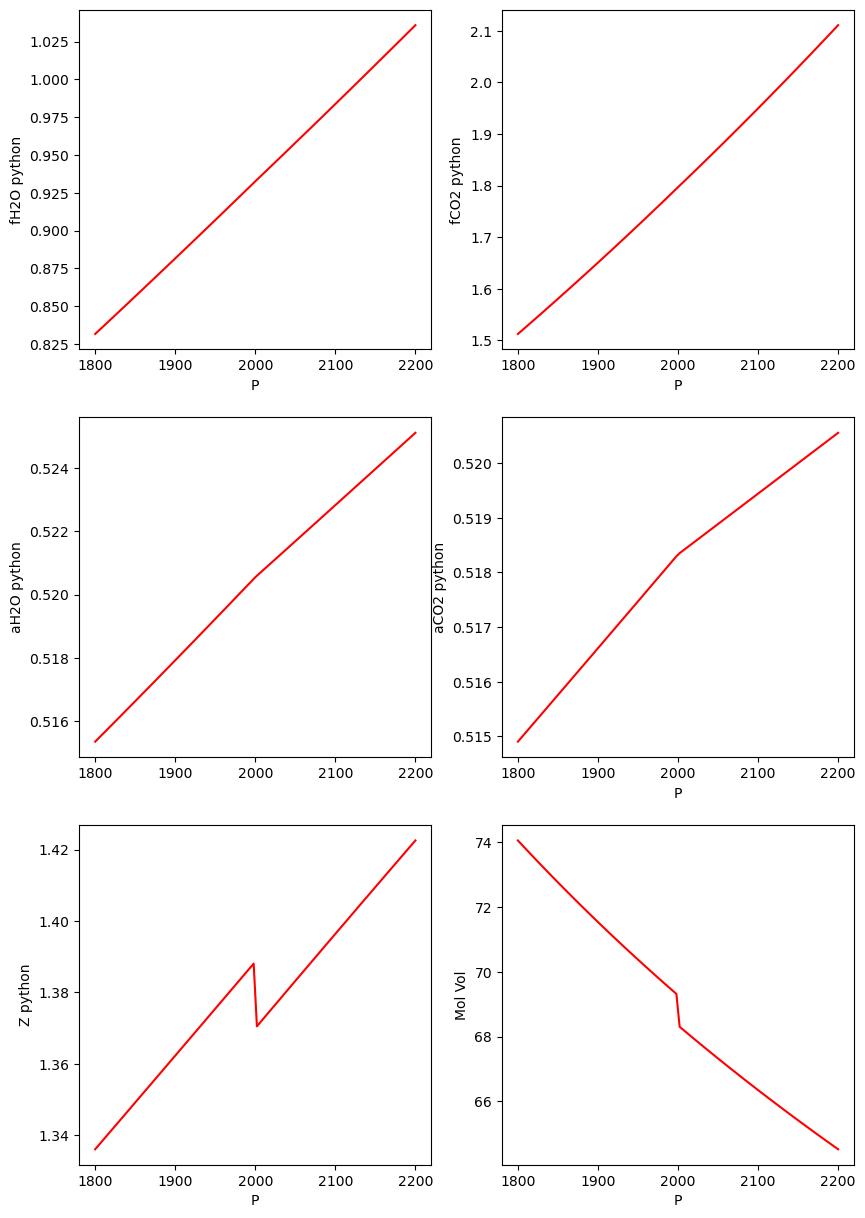

In [10]:
P=pd.Series(np.linspace(1800, 2200, 100))
df=pf.calc_prop_knownP_EOS_DZ2006(P_kbar=P/1000, T_K=1200, XH2O=0.5)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,15))

ax1.plot(P, df['fugacity_H2O (kbar)'], '-r')
ax1.set_ylabel('fH2O python')
ax1.set_xlabel('P')

ax2.plot(P, df['fugacity_CO2 (kbar)'], '-r')
ax2.set_ylabel('fCO2 python')
ax2.set_xlabel('P')

ax3.plot(P, df['activity_H2O'], '-r')
ax3.set_ylabel('aH2O python')

ax4.plot(P, df['activity_CO2'], '-r')
ax4.set_ylabel('aCO2 python')
ax4.set_xlabel('P')

ax5.plot(P, df['Compressability_factor'], '-r')
ax5.set_ylabel('Z python')
ax5.set_xlabel('P')

ax6.plot(P, df['Molar Volume (cm3/mol)'], '-r')
ax6.set_ylabel('Mol Vol')
ax6.set_xlabel('P')
fig.savefig('Offestsat2kbar.png')
